## Визуализация данных с помощью matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np

##### Построение графика при помощи plot()

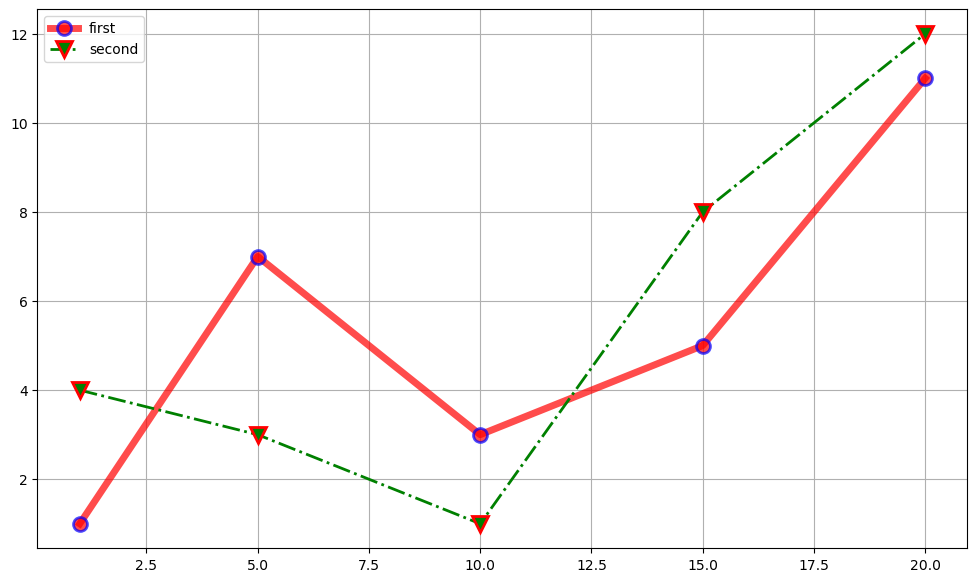

In [2]:
x = [1, 5, 10, 15, 20]
y1 = [1, 7, 3, 5, 11]
y2 = [4, 3, 1, 8, 12]
plt.figure(figsize=(12, 7))
plt.plot(x, y1, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.plot(x, y2, 'v-.g', label="second", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)

#### Тестирование заливки графика

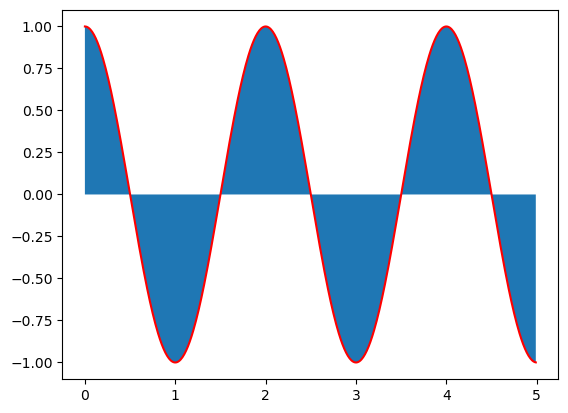

In [3]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)

plt.plot(x, y, c = "r")
plt.fill_between(x, y)

#### Заливка при y > 0.75 и y < 0.75:

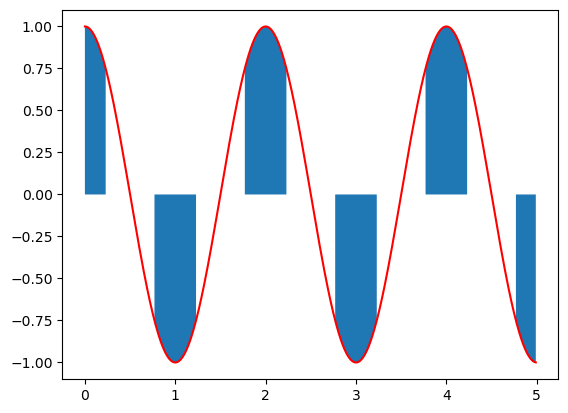

In [4]:
plt.plot(x, y, c="r")
plt.fill_between(x, y, where=(y > 0.75) | (y < -0.75))


#### Заливка области между 0 и y, при условии, что y >= 0:

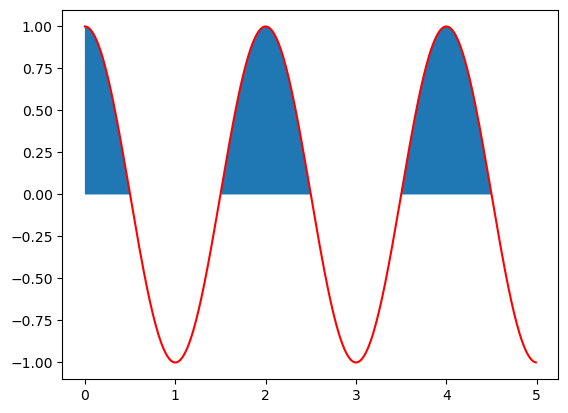

In [5]:
plt.plot(x, y, c="r")
plt.fill_between(x, y, where=(y > 0))

#### Заливка области между 0.5 и y, при условии, что y >= 0.5:

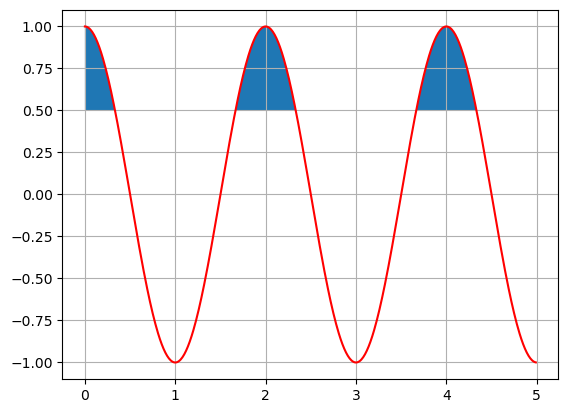

In [6]:
plt.plot(x, y, c="r")
plt.grid()
plt.fill_between(x, 0.5, y, where=(y>=0.5))

#### Заливка область между y и 1:

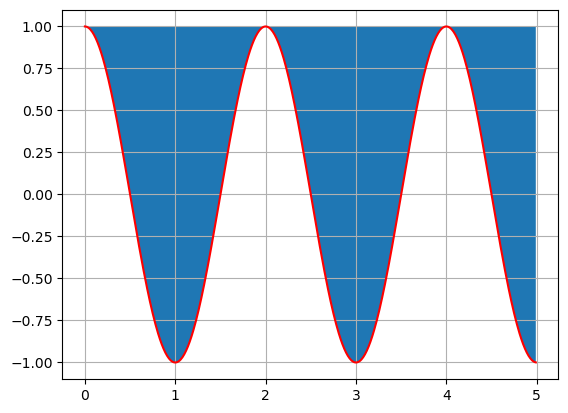

In [7]:
plt.plot(x, y, c="r")
plt.grid()
plt.fill_between(x, y, 1)

#### Вариант двухцветной заливки:

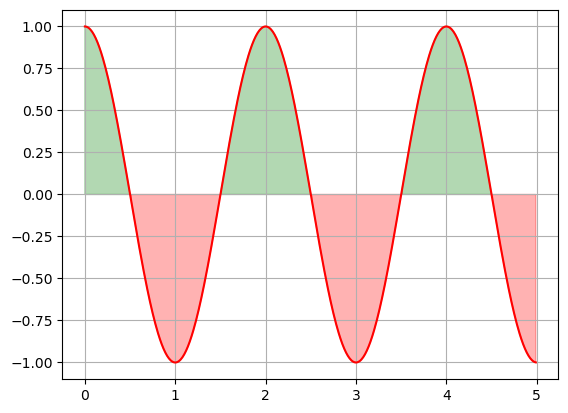

In [8]:
plt.plot(x, y, c="r")
plt.grid()
plt.fill_between(x, y, where=y>=0, color="g", alpha=0.3)
plt.fill_between(x, y, where=y<=0, color="r", alpha=0.3)

### Настройка маркировки графиков

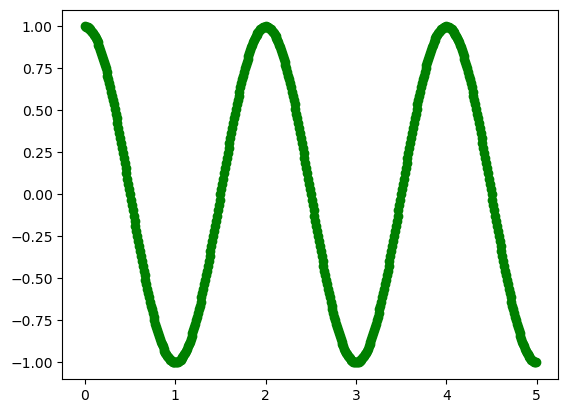

In [9]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x*np.pi)

plt.plot(x, y, marker="o", c="g")

#### Пример, демонстрирующий работу с markevery

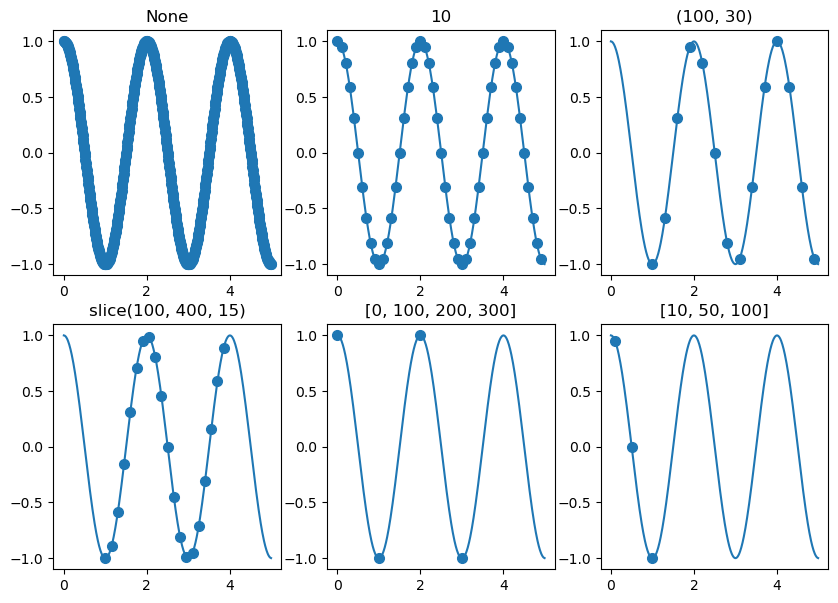

In [10]:
x = np.arange(0.0, 5, 0.01)

y = np.cos(x * np.pi)
m_ev_case = [None, 10, (100, 30), slice(100,400,15), [0, 100, 200, 300], [10,
50, 100]]

fig, ax = plt.subplots(2, 3, figsize=(10, 7))
axs = [ax[i, j] for i in range(2) for j in range(3)]

for i, case in enumerate(m_ev_case):
    axs[i].set_title(str(case))
    axs[i].plot(x, y, "o", ls='-', ms=7, markevery=case)

### Обрезка графиков

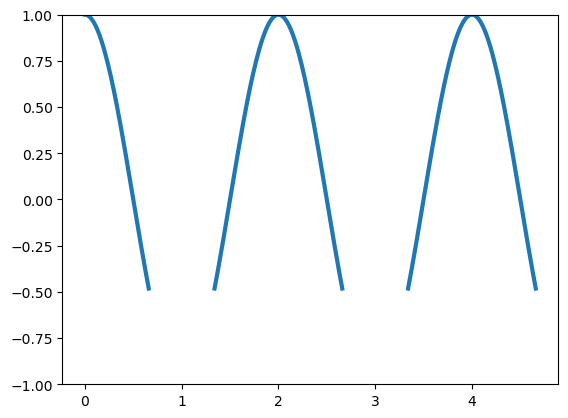

In [11]:
x = np.arange(0.0, 5, 0.01)
y = np.cos(x * np.pi)
y_masked = np.ma.masked_where(y < -0.5, y)
plt.ylim(-1, 1)
plt.plot(x, y_masked, linewidth=3)

### Ступенчатый график

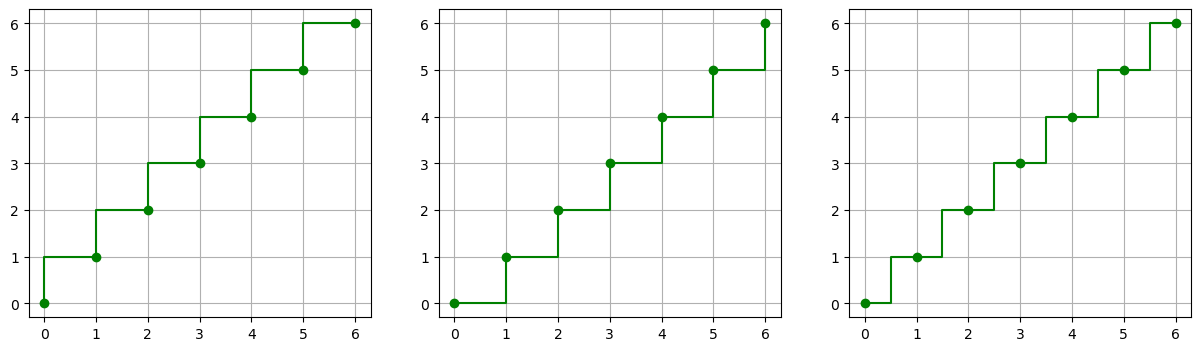

In [12]:
x = np.arange(0, 7)
y = x
where_set = ['pre', 'post', 'mid']
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, ax in enumerate(axs):
    ax.step(x, y, "g-o", where=where_set[i])
    ax.grid()

### Стековый график

Верхний край области y2 определяется как сумма значений из наборов y1 и y2, y3 –
соответственно сумма y1, y2 и y3.

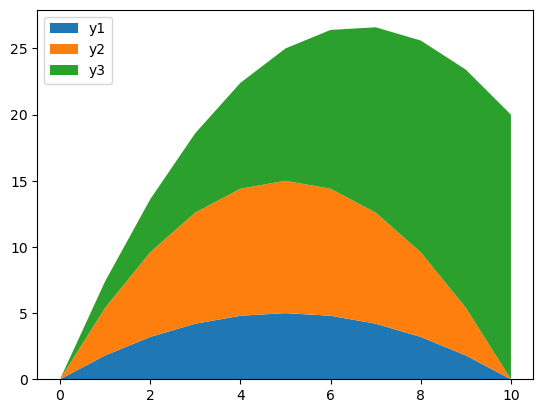

In [13]:
x = np.arange(0, 11, 1)
y1 = np.array([(-0.2)*i**2+2*i for i in x])
y2 = np.array([(-0.4)*i**2+4*i for i in x])
y3 = np.array([2*i for i in x])
labels = ["y1", "y2", "y3"]
fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, y3, labels=labels)
ax.legend(loc='upper left')

### Stem-график

Визуально этот график выглядит как набор линий от точки с координатами (x, y) до базовой
линии, в верхней точке ставится маркер:

<StemContainer object of 3 artists>

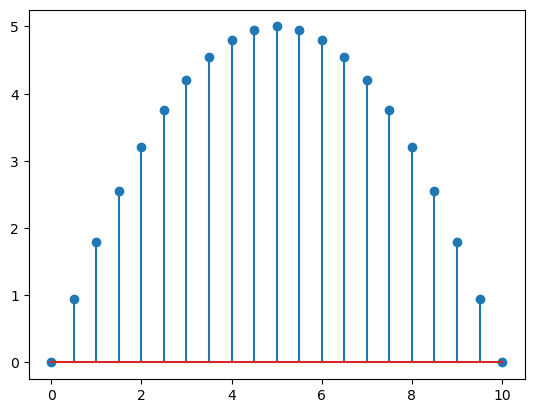

In [14]:
x = np.arange(0, 10.5, 0.5)
y = np.array([(-0.2)*i**2+2*i for i in x])
plt.stem(x, y)

Stem-график с добавлением доп. параметрами:
<ul>
<li> linefmt - стиль вертикальной линии </li>
<li> markerfmt - формат маркера </li>
<li> bottom - y-координата базовой линии </li>
</ul>

<StemContainer object of 3 artists>

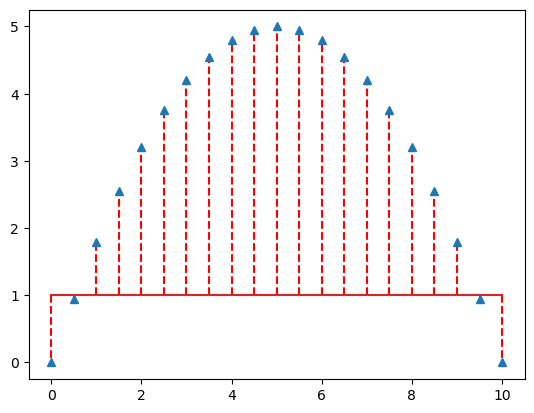

In [15]:
plt.stem(x, y, linefmt="r--", markerfmt="^", bottom=1)

### Точечный график

Для отображения точечного графика предназначена функция scatter(). В простейшем виде
точечный график можно получить передав функции scatter() наборы точек для x, y координат.

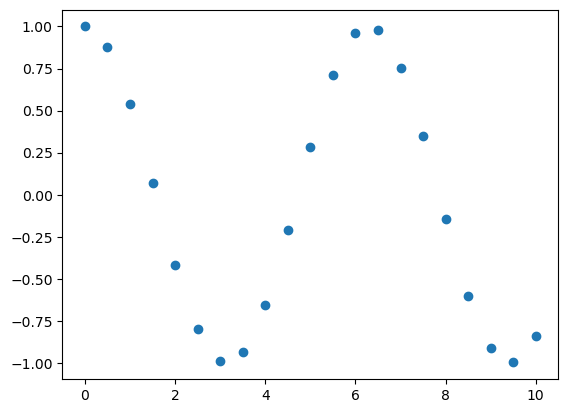

In [16]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)

plt.scatter(x, y)

#### Решение, использующее расширенные параметры для настройки отображения графика:

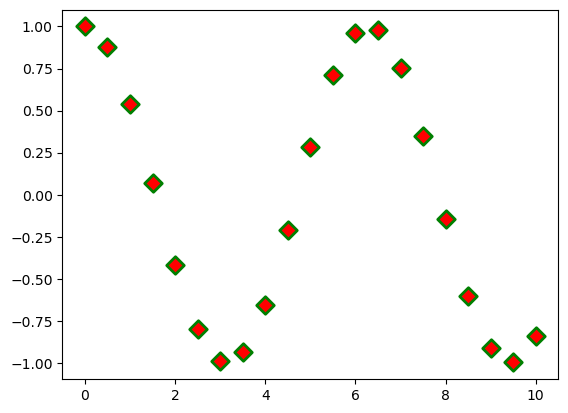

In [17]:
x = np.arange(0, 10.5, 0.5)
y = np.cos(x)
plt.scatter(x, y, s=80, c="r", marker="D", linewidths=2, edgecolors="g")

### Пример, демонстрирующий работу с цветом и размером:

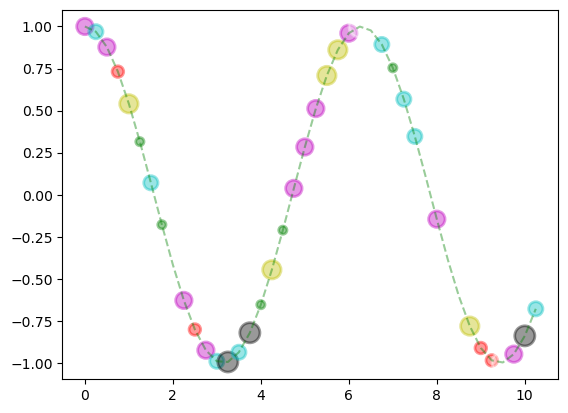

In [18]:
import matplotlib.colors as mcolors

bc = mcolors.BASE_COLORS

x = np.arange(0, 10.5, 0.25)
y = np.cos(x)

num_set = np.random.randint(1, len(mcolors.BASE_COLORS), len(x))
sizes = num_set * 35
colors = [list(bc.keys())[i] for i in num_set]

plt.scatter(x, y, s=sizes, alpha=0.4, c=colors, linewidths=2, edgecolors="face")

plt.plot(x, y, "g--", alpha=0.4)

### Столбчатые диаграммы

Для визуализации категориальных данных хорошо подходят столбчатые диаграммы. Для их
построения используются функции:
<br> bar() – для построения вертикальной диаграммы
<br> barh() – для построения горизонтальной диаграммы

<BarContainer object of 7 artists>

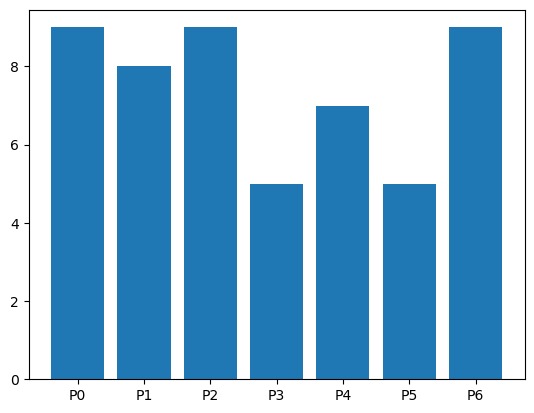

In [19]:
np.random.seed(123)

groups = [f"P{i}" for i in range(7)]
counts = np.random.randint(3, 10, len(groups))

plt.bar(groups, counts)

Если заменим bar() на barh() получим горизонтальную диаграмму

<BarContainer object of 7 artists>

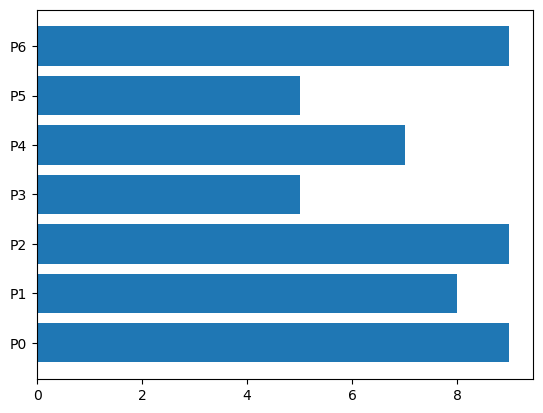

In [20]:
plt.barh(groups, counts)

#### Более сложный пример, демонстрирующий работу с параметрами:

<BarContainer object of 7 artists>

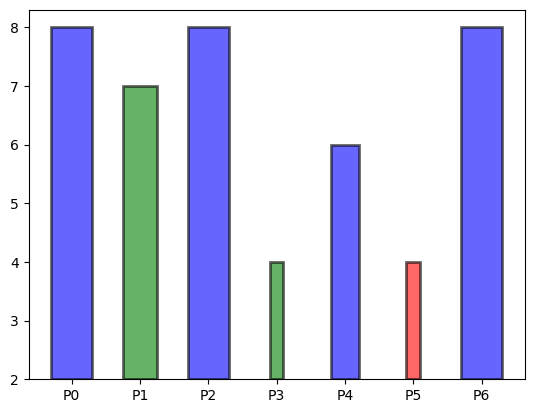

In [21]:
import matplotlib.colors as mcolors

bc = mcolors.BASE_COLORS

np.random.seed(123)

groups = [f"P{i}" for i in range(7)]
counts = np.random.randint(0, len(bc), len(groups))

width = counts*0.1
colors = [["r", "b", "g"][int(np.random.randint(0, 3, 1))] for _ in counts]
plt.bar(groups, counts, width=width, alpha=0.6, bottom=2, color=colors,
edgecolor="k", linewidth=2)

### Групповые столбчатые диаграммы

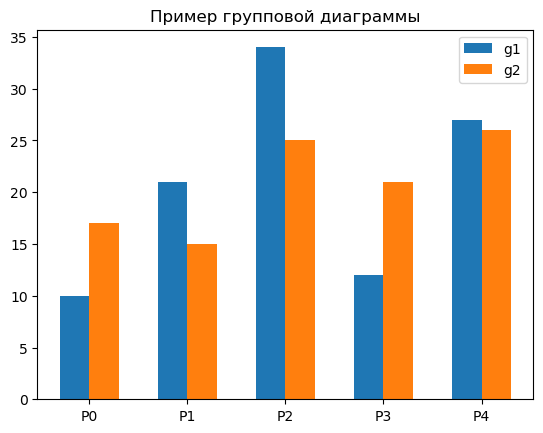

In [22]:
cat_par = [f"P{i}" for i in range(5)]

g1 = [10, 21, 34, 12, 27]
g2 = [17, 15, 25, 21, 26]

width = 0.3

x = np.arange(len(cat_par))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, g1, width, label='g1')
rects2 = ax.bar(x + width/2, g2, width, label='g2')

ax.set_title('Пример групповой диаграммы')
ax.set_xticks(x)
ax.set_xticklabels(cat_par)

ax.legend()

### Диаграмма с errorbar элементом

Errorbar элемент позволяет задать величину ошибки для каждого элемента графика. Для этого
используются параметры xerr, yerr и ecolor (для задания цвета):

<BarContainer object of 5 artists>

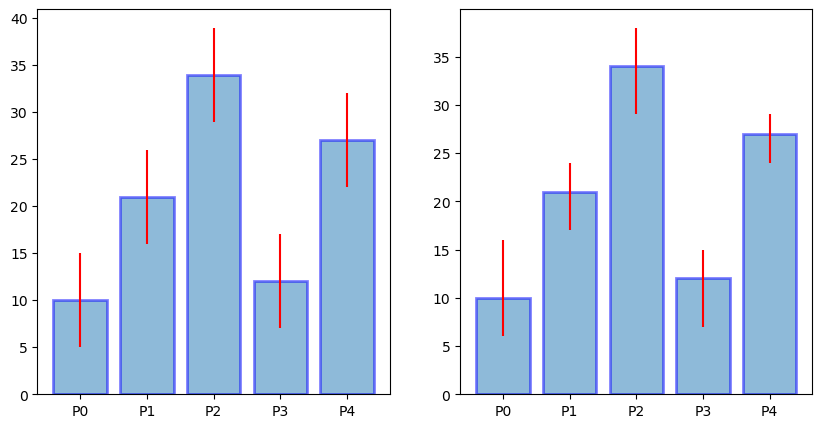

In [23]:
np.random.seed(123)

rnd = np.random.randint

cat_par = [f"P{i}" for i in range(5)]
g1 = [10, 21, 34, 12, 27]

error = np.array([[rnd(2,7),rnd(2,7)] for _ in range(len(cat_par))]).T
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(cat_par, g1, yerr=5, ecolor="r", alpha=0.5, edgecolor="b",
linewidth=2)
axs[1].bar(cat_par, g1, yerr=error, ecolor="r", alpha=0.5, edgecolor="b",
linewidth=2)


### Круговые диаграммы


### Классическая круговая диаграмма

(-1.1163226287452406,
 1.1007772680354877,
 -1.1107362350259515,
 1.1074836529113834)

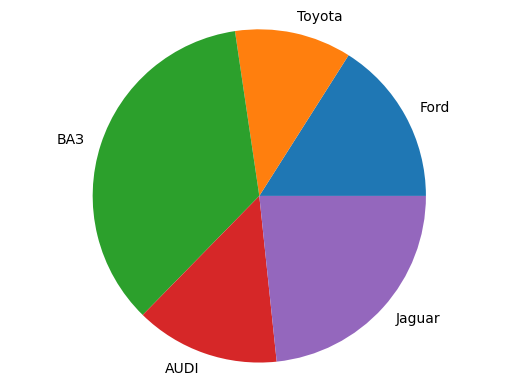

In [24]:
vals = [24, 17, 53, 21, 35]
labels = ["Ford", "Toyota", "ВАЗ", "AUDI", "Jaguar"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")

(-1.2704955621219602,
 1.1999223938155328,
 -1.1121847055183558,
 1.1379015332518725)

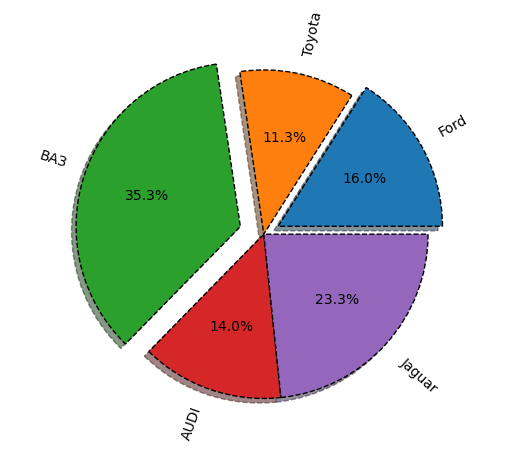

In [25]:
vals = [24, 17, 53, 21, 35]
labels = ["Ford", "Toyota", "ВАЗ", "AUDI", "Jaguar"]
explode = (0.1, 0, 0.15, 0, 0)
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,
wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

### Вложенные круговые диаграммы

([<matplotlib.patches.Wedge at 0x205427bc850>,
 [Text(0.646314344414094, 0.13370777166859046, ''),
  Text(0.4521935266177387, 0.48075047008298655, ''),
  Text(0.040366679721656945, 0.6587643973138266, ''),
  Text(-0.34542288787409087, 0.5623904591409097, ''),
  Text(-0.6578039053946477, 0.05379611554331286, ''),
  Text(-0.48987451889717687, -0.44229283934431896, ''),
  Text(-0.12049606360635531, -0.6489073112975174, ''),
  Text(0.39011356818311405, -0.532363976917521, ''),
  Text(0.6332653697075483, -0.1859434632601054, '')])

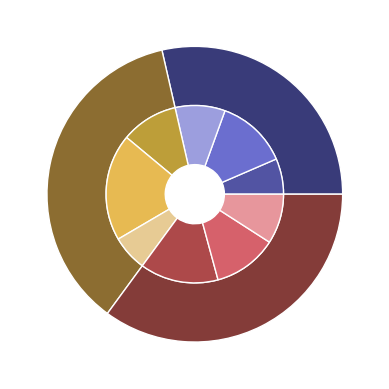

In [26]:
fig, ax = plt.subplots()

offset=0.4

data = np.array([[5, 10, 7], [8, 15, 5], [11, 9, 7]])
cmap = plt.get_cmap("tab20b")

b_colors = cmap(np.array([0, 8, 12]))
sm_colors = cmap(np.array([1, 2, 3, 9, 10, 11, 13, 14, 15]))

ax.pie(data.sum(axis=1), radius=1, colors=b_colors,
wedgeprops=dict(width=offset, edgecolor='w'))

ax.pie(data.flatten(), radius=1-offset, colors=sm_colors,
wedgeprops=dict(width=offset, edgecolor='w'))

### Круговая диаграмма в виде бублика

([<matplotlib.patches.Wedge at 0x20542741e80>,
 [Text(0.9639373540021144, 0.5299290306818474, 'Ford'),
  Text(0.22870287165240302, 1.075962358309037, 'Toyota'),
  Text(-1.046162158377023, 0.3399187231970734, 'ВАЗ'),
  Text(-0.3617533684721028, -1.0388139873909512, 'AUDI'),
  Text(0.8174592712713289, -0.7360437078139777, 'Jaguar')])

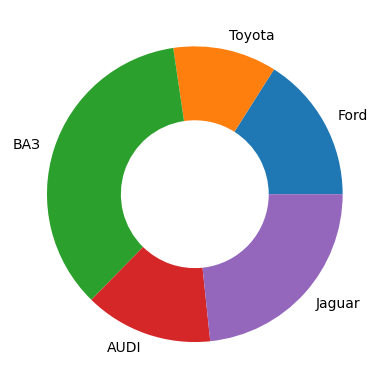

In [27]:
vals = [24, 17, 53, 21, 35]
labels = ["Ford", "Toyota", "ВАЗ", "AUDI", "Jaguar"]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5))